- Bài tập 2 - Mô hình hóa thống kê
- NHÓM 10
- Phạm Thị Hoà - 23C23007
- Trịnh Quang Trí - 23C23011

- Link data set: https://www.kaggle.com/datasets/uciml/autompg-dataset

In [1]:
#library(dplyr)
library(car)
library(MASS)
library(caret)
library(magrittr)
library(ggplot2)
options(warn = -1)
set.seed(42)

Loading required package: carData

Loading required package: ggplot2

Loading required package: lattice



In [2]:
# Đường dẫn tới file hiện tại
base_path <- getwd()
setwd(base_path)

In [3]:
# Đường dẫn lưu trữ dữ liệu
path <- paste(base_path, "../datasets/auto-mpg_data.csv", sep = "/")
# Gán dữ liệu vào biến df
df <- read.csv(path,header = FALSE, sep = "")
# Đổi tên cột dữ liệu
names(df) <- c("mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "modelyear", "origin", "carname")
# # # Xem 6 dòng đầu tiên của dữ liệu
head(df)


,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>
1,18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165.0,3693,11.5,70,1,buick skylark 320
3,18,8,318,150.0,3436,11.0,70,1,plymouth satellite
4,16,8,304,150.0,3433,12.0,70,1,amc rebel sst
5,17,8,302,140.0,3449,10.5,70,1,ford torino
6,15,8,429,198.0,4341,10.0,70,1,ford galaxie 500


### Thông tin của bộ dữ liệu
- V1: mpg: Miles per Gallon (biểu thị số dặm mà một chiếc xe có thể đi được trên một gallon nhiên liệu): continuous
- V2: cylinders (biểu thị số lượng xy-lanh trong động cơ xe): multi-valued discrete
- V3: displacement (biểu thị dung tích xy-lanh của động cơ - Dung tích xy-lanh càng lớn thì động cơ càng mạnh nhưng thường tiêu tốn nhiên liệu hơn): continuous
- V4: horsepower (biểu thị công suất động cơ xe, thường được đo bằng mã lực - Công suất động cơ cao hơn đồng nghĩa với khả năng xe đạt tốc độ cao hơn và tăng tốc tốt hơn): continuous
- V5: weight (biểu thị trọng lượng của xe - Trọng lượng xe ảnh hưởng đến khả năng tăng tốc, tiêu thụ nhiên liệu và độ ổn định khi lái): continuous
- V6: acceleration (biểu thị khả năng tăng tốc của xe, thường được đo bằng thời gian (giây) để xe tăng tốc từ 0 đến 60 mph (0-100 km/h). Thời gian tăng tốc ngắn hơn chỉ ra khả năng tăng tốc tốt hơn): continuous
- V7: model year (biểu thị năm sản xuất của mẫu xe - trong bộ dữ liệu này: 1970 đến 1982): multi-valued discrete
- V8: origin (biểu thị nguồn gốc của chiếc xe, với các giá trị thường là 1 (Mỹ), 2 (Châu Âu), và 3 (Nhật Bản)): multi-valued discrete
- V9: car name (chứa tên xe, là chuỗi ký tự và thường là duy nhất cho mỗi chiếc xe trong bộ dữ liệu. Tên xe có thể bao gồm tên nhà sản xuất và mẫu xe cụ thể): string (unique for each instance)


In [4]:
# Kiểm tra số dòng và số cột của dữ liệu:
dim(df)

[1] 398   9

In [5]:
# Kiểm tra dữ liệu
str(df) # Xem cấu trúc dữ liệu


'data.frame':	398 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : chr  "130.0" "165.0" "150.0" "150.0" ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ modelyear   : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ carname     : chr  "chevrolet chevelle malibu" "buick skylark 320" "plymouth satellite" "amc rebel sst" ...


In [6]:
# Kiểm tra dữ liệu unique của bộ dữ liệu
for (col in colnames(df)) {
    print(col)
    print(length(unique(df[[col]])))
}


[1] "mpg"
[1] 129
[1] "cylinders"
[1] 5
[1] "displacement"
[1] 82
[1] "horsepower"
[1] 94
[1] "weight"
[1] 351
[1] "acceleration"
[1] 95
[1] "modelyear"
[1] 13
[1] "origin"
[1] 3
[1] "carname"
[1] 305


### Nhận xét về dữ liệu:
- Cột V2: cylinders Số Xilanh: Có 5 giá trị unique: Đây là một biến phân loại, cần as factor biến này
- Cột V4: horsepower: mã lực là một biến số liên tục, trong bộ dữ liệu đang có dạng str nên cần chuyển thành dạng numeric cho biến này
- Cột V7: model year: có 13 giá trị unique, đây là biến phân loại, cần as factor biến này
- Cột V8: origin: Xuất xứ: có 3 giá trị unique, đây là biến phân loại, cần as factor biến này
- Cột V9: carname: Là tên của các loại xe, dữ liệu này không có ý nghĩa cho việc phân tích, nên loại biến carname này ra khỏi bộ dữ liệu

In [7]:
# Loại cột carname
df <- subset(df, select = -carname)

In [8]:
# Chuyển dữ liệu cột V4: horsepower thành dạng numeric
df$horsepower = as.numeric(df$horsepower)

In [9]:
# Phân loại dữ liệu liên tục và rời rạc:
list_ltuc = c("mpg", "displacement", "horsepower", "weight", "acceleration")
list_ploai = c("cylinders","modelyear","origin")

In [10]:
# Kiểm tra giá trị thiếu
colSums(is.na(df))


mpg    cylinders displacement   horsepower       weight acceleration 
           0            0            0            6            0            0 
   modelyear       origin 
           0            0

- Cột horsepower có 6 giá trị bị thiếu: Chiếm 6/398*100 = 1.50753768844221%, đây là một tỉ lệ nhỏ nên ta có thể loại bỏ những dòng dữ liệu này khỏi bộ dữ liệu

In [11]:
# Xoá bỏ dữ liệu na
df <- na.omit(df)
# Kiểm tra lại số dòng và số cột sau khi đã loại bỏ na
dim(df)

[1] 392   8

In [12]:
## Phân chia bộ dữ liệu thành 2 tập train.data và test.data
set.seed(42)
sample <- sample(c(TRUE, FALSE), nrow(df), replace=TRUE, prob=c(0.8,0.2))
train.data  <- df[sample, ]
test.data   <- df[!sample, ]
dim(train.data)
dim(test.data)

[1] 313   8

[1] 79  8

### XỬ LÝ BIẾN LIÊN TỤC

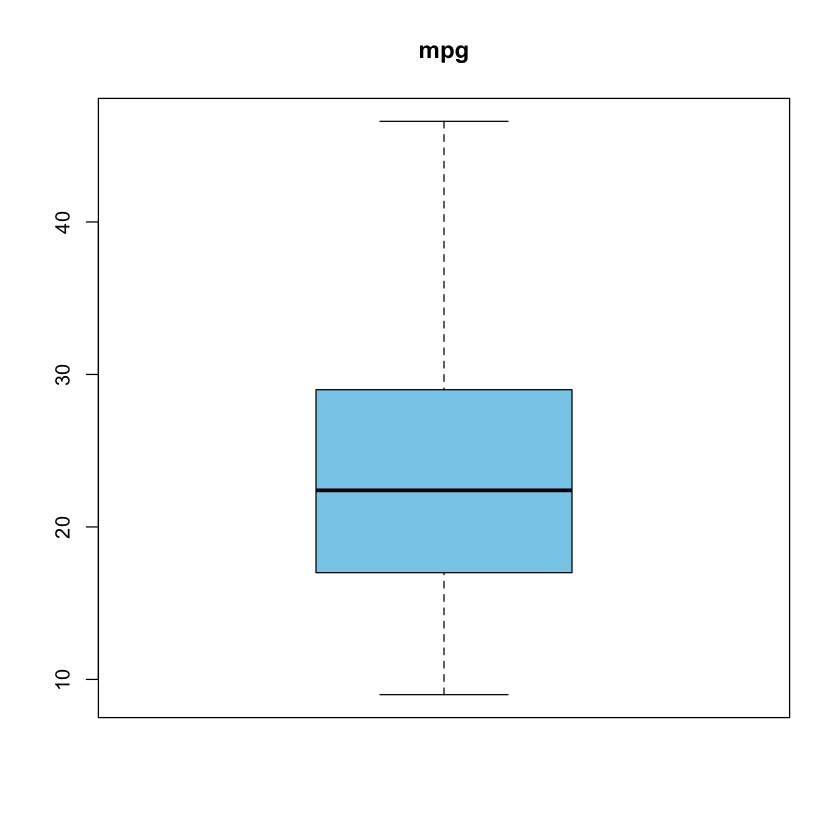

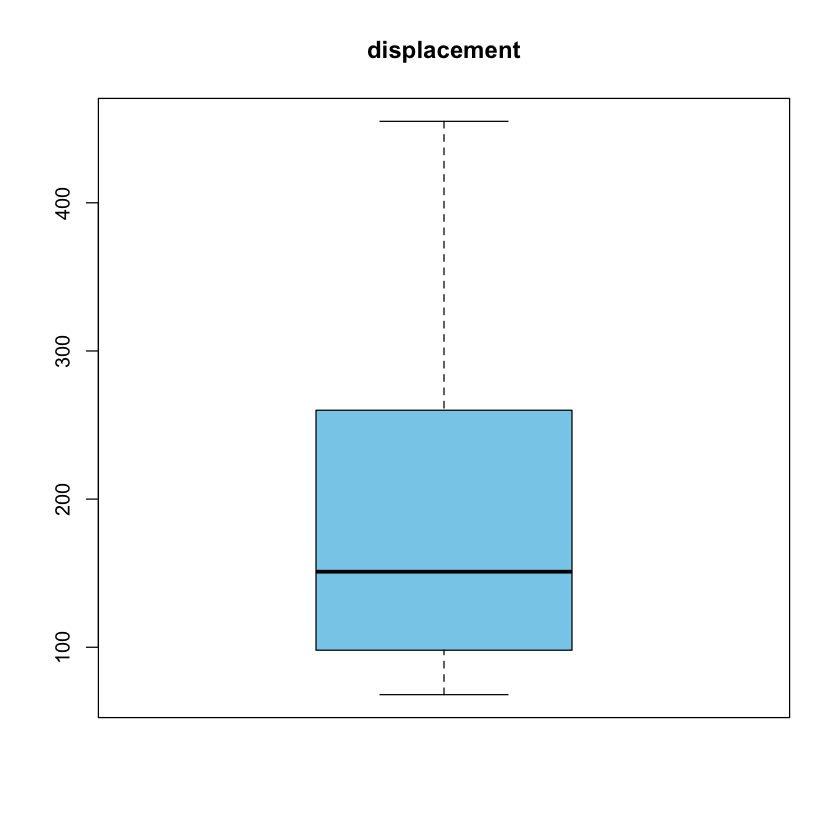

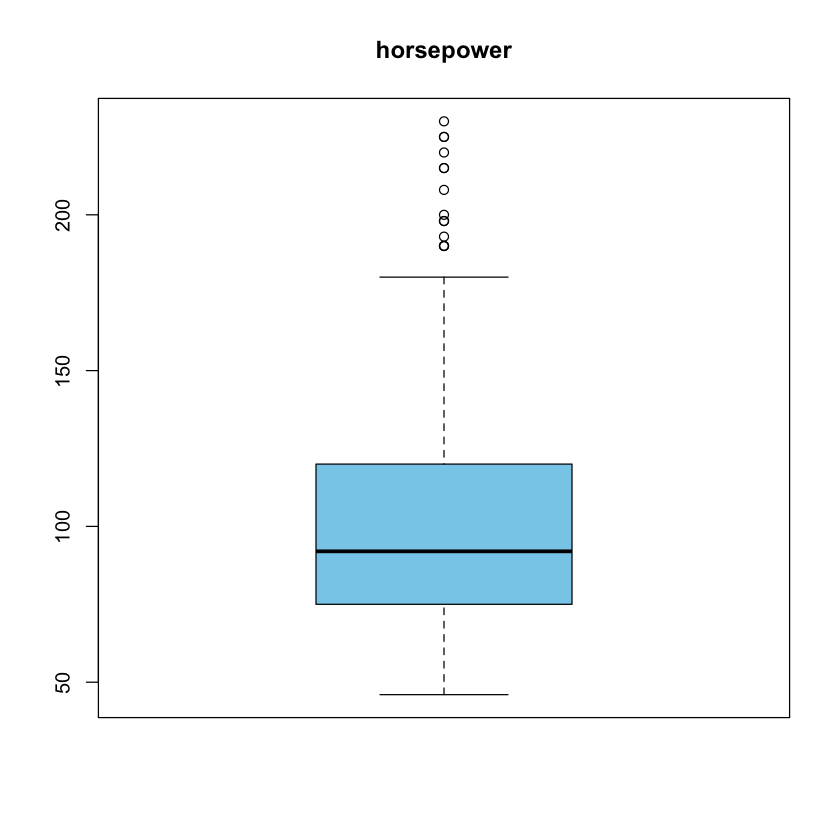

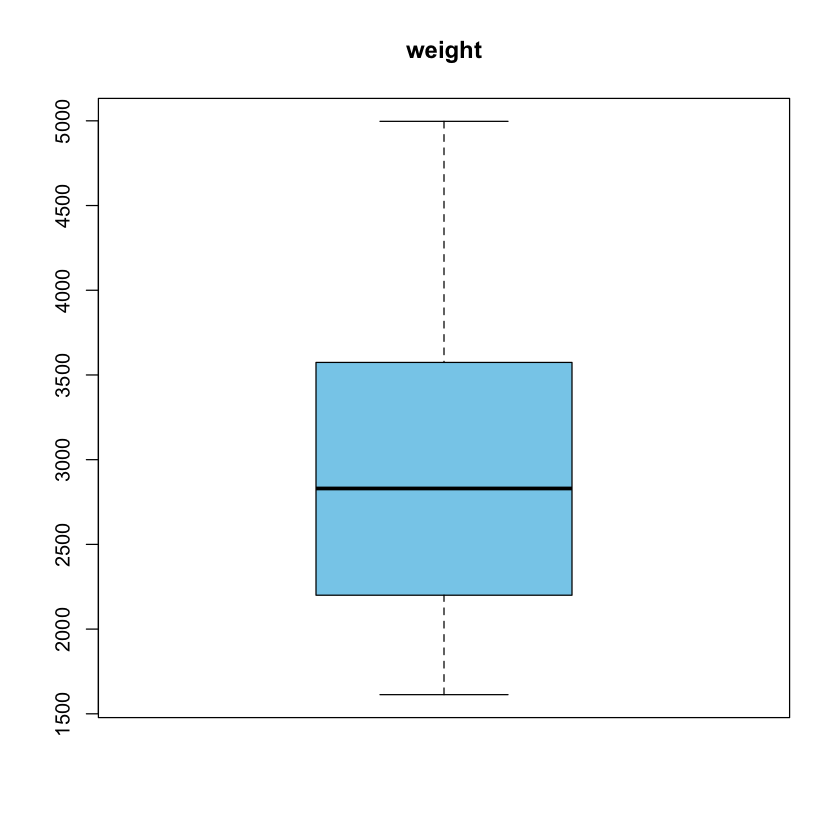

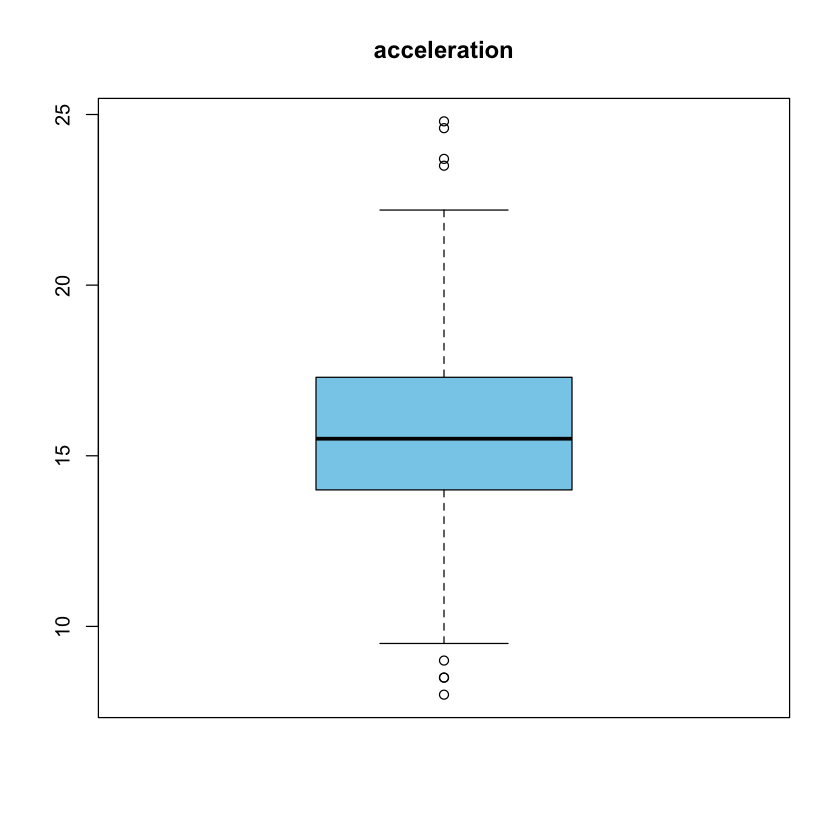

In [13]:
# Vẽ Boxplot cho dữ liệu liên tục:
for (col in list_ltuc) {
    boxplot(train.data[[col]], col = "skyblue", main = col)
}


- Dữ liệu tồn tại giá trị ngoại lai

In [14]:
# Lưu tất cả dữ liệu ngoại lai vào outlier_df
outlier_df <- data.frame()
for (col in list_ltuc) {
    Q1 <- quantile(train.data[[col]], 0.25)
    Q3 <- quantile(train.data[[col]], 0.75)
    IQR <- Q3 - Q1
    outliers <- df[train.data[[col]] < (Q1 - 1.5 * IQR) | train.data[[col]] > (Q3 + 1.5 * IQR), ]
    n_out <- nrow(outliers)
    print(paste("So outlier cua cot ", col, ": ", n_out))
    outlier_df <- rbind(outlier_df, outliers)
}
print(paste("Tong so outlier cua train.data: ", nrow(unique(outlier_df))))


[1] "So outlier cua cot  mpg :  0"
[1] "So outlier cua cot  displacement :  0"
[1] "So outlier cua cot  horsepower :  26"
[1] "So outlier cua cot  weight :  0"
[1] "So outlier cua cot  acceleration :  13"


[1] "Tong so outlier cua train.data:  33"


In [15]:
# Xem các dòng có giá trị ngoại lai
outlier_df = unique(outlier_df)
outlier_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
3,18.0,8,318,150,3436,11.0,70,1
4,16.0,8,304,150,3433,12.0,70,1
5,17.0,8,302,140,3449,10.5,70,1
6,15.0,8,429,198,4341,10.0,70,1
7,14.0,8,454,220,4354,9.0,70,1
10,15.0,8,390,190,3850,8.5,70,1
17,18.0,6,199,97,2774,15.5,70,1
18,21.0,6,200,85,2587,16.0,70,1
19,27.0,4,97,88,2130,14.5,70,3


- Có toàn bộ 33 dòng có outlier trong toàn bộ dữ liệu, chiếm 33/313*100 = 10.5%, với tỉ lệ này => Ta có thể loại bỏ các dòng outlier này ra khỏi bộ dữ liệu 

In [16]:
# Loại bỏ dữ liệu ngoại lai:
# Lấy các chỉ số hàng có outlier
outlier_indices = as.numeric(rownames(outlier_df))
# outlier_indices
train.data <- train.data[-outlier_indices, ]
dim(train.data)

[1] 294   8

In [17]:
# Ma trận tương quan R của dữ liệu
R <- cor(train.data[,list_ltuc])
R

,mpg,displacement,horsepower,weight,acceleration
mpg,1.0000000,-0.7975867,-0.7796592,-0.8239245,0.4195107
displacement,-0.7975867,1.0000000,0.8876205,0.9374277,-0.4774265
horsepower,-0.7796592,0.8876205,1.0000000,0.8672309,-0.6735949
weight,-0.8239245,0.9374277,0.8672309,1.0000000,-0.3705755
acceleration,0.4195107,-0.4774265,-0.6735949,-0.3705755,1.0000000


In [18]:
df_ltuc = train.data[,list_ltuc]

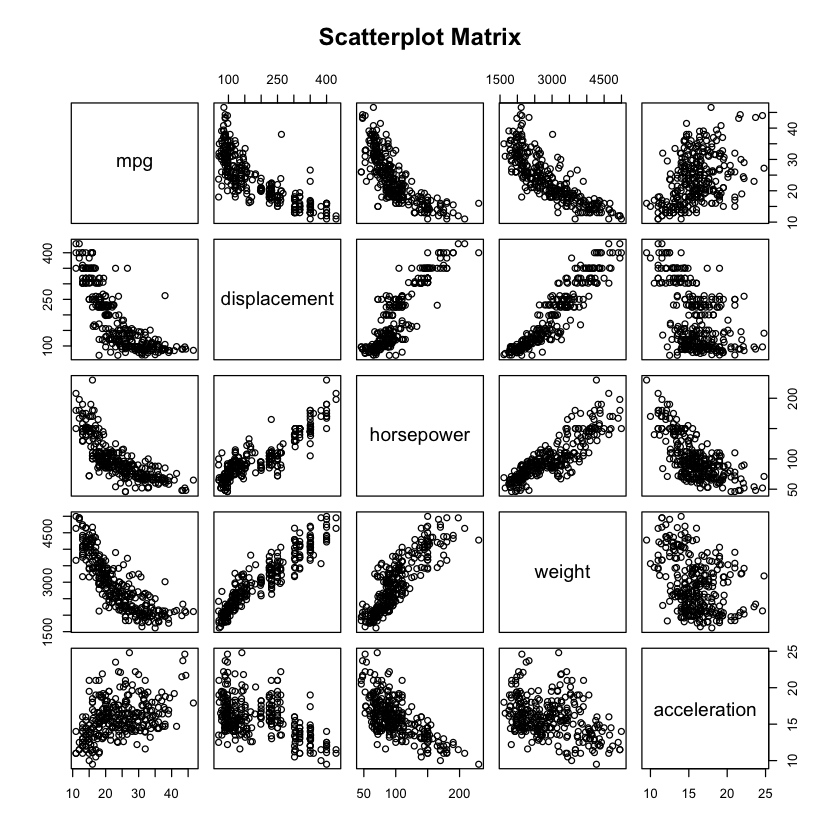

In [19]:
# Vẽ biểu đồ Scatterplot cho toàn bộ các cột dữ liệu
pairs(df_ltuc, main = "Scatterplot Matrix")

#### KIỂM TRA HIỆN TƯỢNG ĐA CỘNG TUYẾN CỦA DỮ LIỆU
- Chỉ chọn những biến liên tục để kiểm tra

In [20]:
mod_reg = lm(mpg ~., data = df_ltuc)
summary(mod_reg)


Call:
lm(formula = mpg ~ ., data = df_ltuc)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.8847  -2.9182  -0.3879   2.4929  16.0120 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  42.624491   3.139001  13.579  < 2e-16 ***
displacement -0.003374   0.008155  -0.414    0.679    
horsepower   -0.038174   0.023184  -1.647    0.101    
weight       -0.005783   0.001035  -5.587 5.34e-08 ***
acceleration  0.164074   0.156171   1.051    0.294    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.271 on 289 degrees of freedom
Multiple R-squared:  0.6974,	Adjusted R-squared:  0.6932 
F-statistic: 166.5 on 4 and 289 DF,  p-value: < 2.2e-16


In [21]:
vif(mod_reg)

displacement   horsepower       weight acceleration 
   10.292108    10.047374    11.616962     2.805565

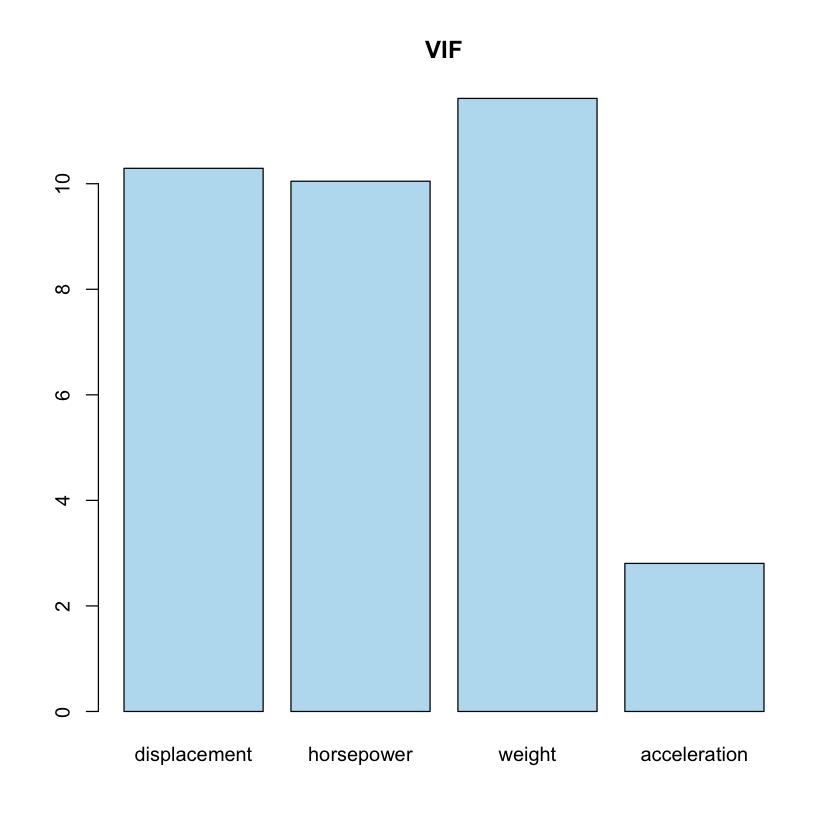

In [22]:
barplot(vif(mod_reg), col = "#bbdef1", main = "VIF")

- Biến weight có chỉ số Vif = 11.62 > 10 => Tồn tại hiện tượng đa cộng tuyến, do đó loại bỏ biến weight khỏi bộ dữ liệu

#### KIỂM TRA LẠI HIỆN TƯỢNG ĐA CỘNG TUYẾN SAU KHI ĐÃ LOẠI BỎ BIẾN weight

In [23]:
# Loại cột weight
df_ltuc <- subset(df_ltuc, select = -weight)
mod_reg = lm(mpg ~., data = df_ltuc)
summary(mod_reg)


Call:
lm(formula = mpg ~ ., data = df_ltuc)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5869  -3.3085  -0.5287   2.2554  16.2363 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  44.916196   3.270171  13.735  < 2e-16 ***
displacement -0.034821   0.006201  -5.615 4.59e-08 ***
horsepower   -0.101884   0.021211  -4.803 2.51e-06 ***
acceleration -0.275726   0.141730  -1.945   0.0527 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.488 on 290 degrees of freedom
Multiple R-squared:  0.6648,	Adjusted R-squared:  0.6613 
F-statistic: 191.7 on 3 and 290 DF,  p-value: < 2.2e-16


In [24]:
vif(mod_reg)

displacement   horsepower acceleration 
    5.389027     7.616516     2.092689

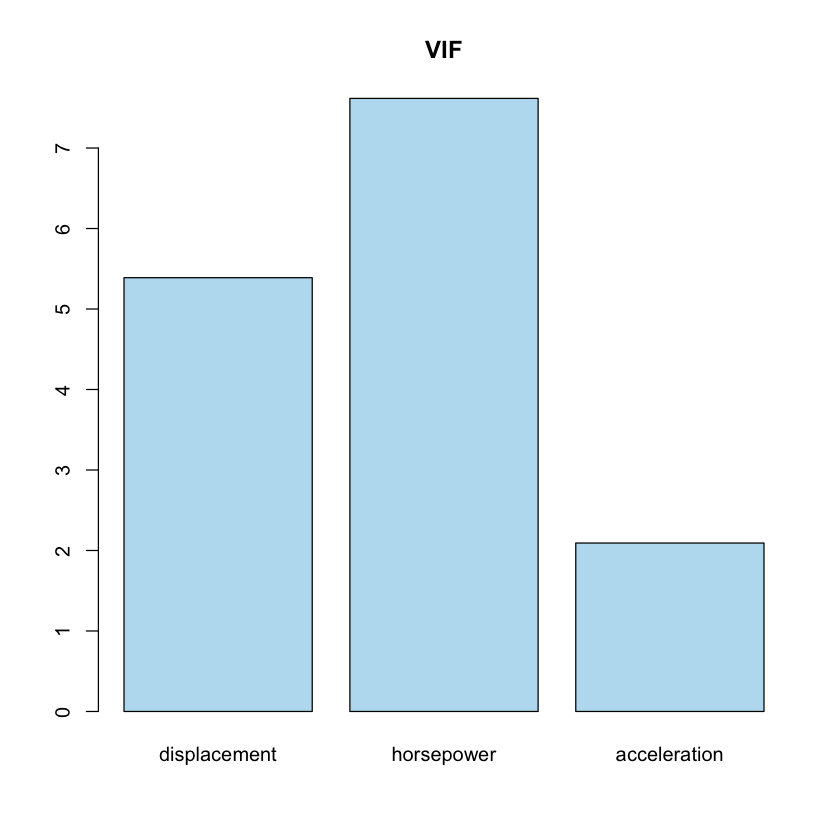

In [25]:
barplot(vif(mod_reg), col = "#bbdef1", main = "VIF")

- Sau khi loại khỏi biến weight ra khỏi bộ dữ liệu train data, ta thấy rằng chỉ số Vif của các biến còn lại < 10, do đó ta có thể sử dụng các biến này trong mô hình dự đoán.
- Tuy nhiên chỉ số vif của biến horsepower đang ~ 7.6 nên chúng tôi cũng đang cân nhắc loại biến này ra khỏi mô hình. Do đó chúng tôi quyết định sẽ xây dựng 2 mô hình:
    - model_1: chỉ loại weight ra khỏi bộ dữ liệu
    - model_2: loại đồng thời cả 2 biến weight và horsepower ra khỏi bộ dữ liệu

#### KIỂM TRA LẠI HIỆN TƯỢNG ĐA CỘNG TUYẾN SAU KHI ĐÃ LOẠI BỎ BIẾN horsepower

In [26]:
# Loại cột weight
df_ltuc <- subset(df_ltuc, select = -horsepower)
mod_reg = lm(mpg ~., data = df_ltuc)
summary(mod_reg)


Call:
lm(formula = mpg ~ ., data = df_ltuc)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.6301  -2.9609  -0.4452   2.3901  18.5340 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  32.933749   2.193157   15.02   <2e-16 ***
displacement -0.060781   0.003153  -19.28   <2e-16 ***
acceleration  0.144521   0.115654    1.25    0.212    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.655 on 291 degrees of freedom
Multiple R-squared:  0.6381,	Adjusted R-squared:  0.6356 
F-statistic: 256.5 on 2 and 291 DF,  p-value: < 2.2e-16


In [27]:
vif(mod_reg)

displacement acceleration 
     1.29523      1.29523

- Sau khi loại horsepower chúng tôi nhận thấy rằng chỉ số vif của tất cả các biến đều rất nhỏ, khi đó đã không tồn tại hiện tượng đa cộng tuyến trong bộ dữ liệu

### XỬ LÝ BIẾN PHÂN LOẠI

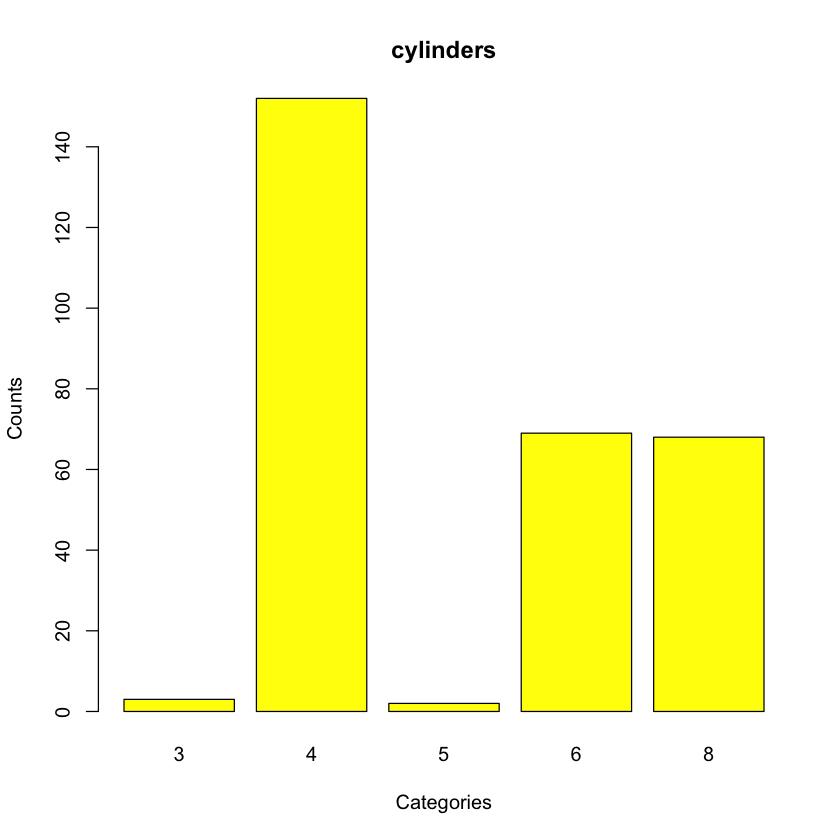

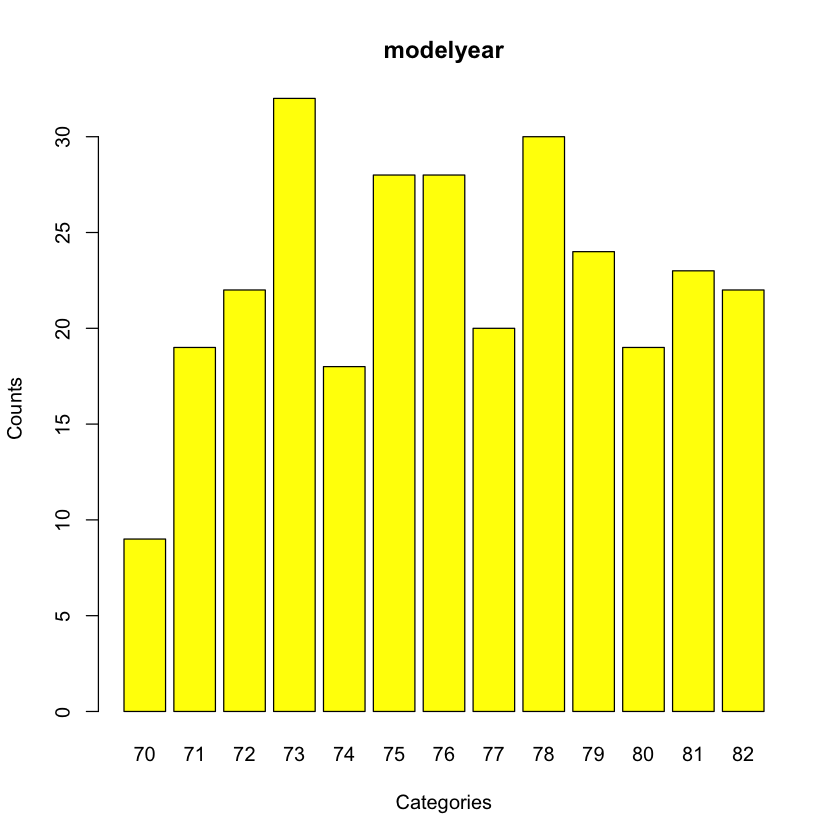

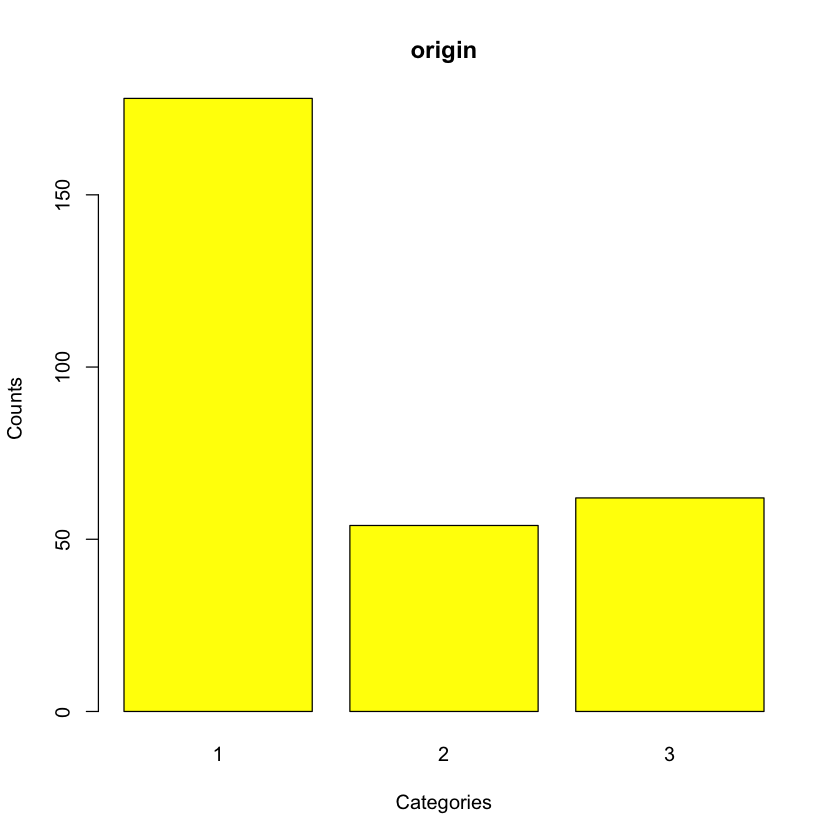

In [28]:
# Vẽ bar plot cho các biến phân loại
for (col in list_ploai){
    # Tạo bảng tần suất
    counts <- table(train.data[[col]])
    # Vẽ biểu đồ cột
    barplot(counts, main = col, xlab = "Categories", ylab = "Counts", col = "yellow")
}



#### Nhận xét biến phân loại:
- Đối với biến cylinders: giá trị 4 có tỉ lệ cao nhất, do đó chọn 4 làm ref cho biến này
- Đối với biến modelyear, giá trị 73 có tỉ lệ cao nhất, do đó chọn 73 làm ref cho biến này
- Đối với biêns origin, giá trị 1 có tỉ lệ cao nhất, do đó chọn 1 làm ref cho biến này

#### Lý do chọn biến có tần suất cao nhất:
- 1. Diễn giải dễ hiểu hơn
Tính chất cơ sở: Khi chọn mức có tần suất cao nhất làm mức tham chiếu, các hệ số hồi quy của các mức khác được diễn giải so với mức phổ biến nhất. Điều này thường làm cho việc diễn giải kết quả mô hình dễ hiểu hơn.
- 2. Tăng cường tính ổn định của mô hình
Ổn định số liệu: Mức tham chiếu có tần suất cao nhất giúp tăng cường tính ổn định của các ước lượng trong mô hình, vì nó thường dựa trên nhiều quan sát hơn. Điều này có thể dẫn đến các ước lượng ít biến động hơn và các khoảng tin cậy hẹp hơn.
- 3. Tăng cường độ tin cậy của ước lượng
Độ tin cậy: Với mức tham chiếu có tần suất cao nhất, các hệ số hồi quy của các mức khác sẽ có độ tin cậy cao hơn vì chúng dựa trên một nhóm dữ liệu lớn hơn. Điều này làm giảm sai số chuẩn của các hệ số ước lượng và tăng độ chính xác của các kiểm định thống kê.

In [29]:
## As factor 3 biến phân loại:
for (col in list_ploai){
    train.data[[col]] = as.factor(train.data[[col]])
}

In [30]:
# Lựa chọn ref cho biến phân loại:
# cylinders: 4
# modelyear: 73
# origin: 1
ref_dict <- c(cylinders = "4", modelyear = "73", origin = "1")
## As factor 3 biến phân loại với ref là giá trị có mod cao nhất:
for (col in list_ploai){
    train.data[[col]] = relevel(train.data[[col]], ref = ref_dict[col])
}


# MÔ HÌNH

## MÔ HÌNH ĐẦY ĐỦ

In [ ]:
## Loại weight ra khỏi train.data
train.data_1 <- subset(train.data, select = -weight)

In [32]:
# Xem lại bộ dữ liệu
str(train.data_1)

'data.frame':	294 obs. of  7 variables:
 $ mpg         : num  18 17 15 24 21 27 26 24 21 28 ...
 $ cylinders   : Factor w/ 5 levels "4","3","5","6",..: 5 5 5 1 4 1 1 1 4 1 ...
 $ displacement: num  318 302 383 113 200 97 97 107 199 140 ...
 $ horsepower  : num  150 140 170 95 85 88 46 90 90 90 ...
 $ acceleration: num  11 10.5 10 15 16 14.5 20.5 14.5 15 15.5 ...
 $ modelyear   : Factor w/ 13 levels "73","70","71",..: 2 2 2 2 2 2 2 2 2 3 ...
 $ origin      : Factor w/ 3 levels "1","2","3": 1 1 1 3 1 3 2 2 1 1 ...


In [33]:
# Full model_1: chỉ loại weight
full_model_1 <- lm(mpg ~., data = train.data_1)
summary(full_model_1)


Call:
lm(formula = mpg ~ ., data = train.data_1)

Residuals:
   Min     1Q Median     3Q    Max 
-6.965 -1.955 -0.223  1.572 12.235 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  39.038483   2.621602  14.891  < 2e-16 ***
cylinders3   -8.930484   1.988033  -4.492 1.04e-05 ***
cylinders5   -4.611070   2.394632  -1.926 0.055198 .  
cylinders6   -3.457920   0.889464  -3.888 0.000127 ***
cylinders8   -0.416963   1.583217  -0.263 0.792469    
displacement -0.016296   0.008756  -1.861 0.063800 .  
horsepower   -0.103323   0.016865  -6.127 3.14e-09 ***
acceleration -0.263719   0.104916  -2.514 0.012528 *  
modelyear70   0.493250   1.225560   0.402 0.687655    
modelyear71   1.535801   0.939856   1.634 0.103399    
modelyear72  -0.530736   0.904984  -0.586 0.558053    
modelyear74   0.915869   0.969722   0.944 0.345769    
modelyear75   0.246057   0.849169   0.290 0.772219    
modelyear76   0.973909   0.848482   1.148 0.252049    
modelyear77   2.835450   0

### NHẬN XÉT:
- Từ bảng kết quả của mô hình đầy đủ, ta có nhận xét sau:
1. Coefficients (Hệ số hồi quy):
- Với mức ý nghĩa alpha = 0.05, Đối với kết quả p-value (Pr(>|t|)) nhỏ hơn alpha cho thấy biến đó có ý nghĩa  thống kê, trong trường hợp này: biến cylinders, acceleration và biến horsepower có p-value lần lượt là 0.013741, 0.091515 và 0.389387 cho thấy các biến này không có ý nghĩa thống kê với mức ý nghĩa alpha = 0.05. Các biến còn lại có ý nghĩa thống kê trong mô hình đầy đủ này với mức ý nghĩa alpha = 0.05
2. Multiple R-squared: 0.8147. Hệ số xác định, cho biết 81.47% biến thiên của mpg được giải thích bởi các biến độc lập trong mô hình. 18.53% biến thiên còn lại của mpg được giải thích bởi một thành phần khác chưa biết
3. F-statistic: 179.7 với p-value < 2.2e-16. Kiểm định tổng thể cho mô hình, cho thấy mô hình là ý nghĩa thống kê.


In [34]:
anova(full_model_1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
cylinders,4,11033.74650,2758.43662,269.410692,2.700137e-93
displacement,1,810.63461,810.63461,79.172974,8.183635e-17
horsepower,1,636.45133,636.45133,62.160860,7.694980e-14
acceleration,1,56.92506,56.92506,5.559750,1.908619e-02
modelyear,12,1954.70964,162.89247,15.909364,2.132656e-25
origin,2,142.63822,71.31911,6.965587,1.121517e-03
Residuals,272,2784.94798,10.23878,NA,NA


### NHẬN XÉT
- 1. Df (Degrees of Freedom) - Bậc Tự Do: Số lượng giá trị tự do trong dữ liệu cho từng nguồn biến đổi.
Residuals có 286 bậc tự do, tính toán dựa trên số quan sát trừ đi số biến trong mô hình (293 - 7)
- 2. Sum Sq (Sum of Squares) - Tổng Bình Phương
Tổng bình phương của các sai lệch, biểu thị tổng độ biến động do từng biến độc lập và phần dư.
- 3. Mean Sq (Mean Square) - Bình Phương Trung Bình
Trung bình của các tổng bình phương, được tính bằng cách chia tổng bình phương cho bậc tự do.
- 4. F value - Giá Trị F: Giá trị F, dùng để kiểm định giả thuyết rằng hệ số hồi quy (bêta) của biến đó bằng 0 
- 5. Pr(>F) - Giá Trị P (p-value): Giá trị p-value cho mỗi kiểm định F, cho biết mức ý nghĩa thống kê của từng biến. (p-value càng nhỏ thì biến đó càng có giá trị thống kê)
- Trong trường hợp này: Với mức ý nghĩa alpha = 0.05
    - cylinders: Có giá trị F rất lớn (908.921333) và giá trị p gần như bằng 0 (8.572973e-91), cho thấy biến này có ảnh hưởng rất lớn đến mpg và là ý nghĩa thống kê cao.
    - displacement, horsepower, weight, modelyear, origin: Cũng có giá trị F và p-value cho thấy ý nghĩa thống kê.
    - acceleration: Có giá trị F thấp (1.842296) và giá trị p lớn hơn 0.05 (1.757522e-01), cho thấy biến này không có ý nghĩa thống kê trong mô hình.

In [35]:
# AIC=2k−2ln(L)
AIC(full_model_1)

[1] 1541.367

### MÔ HÌNH 2: Loại bỏ cả 2 biến weight và horsepower (vì hiện tượng đa cộng tuyến):

In [36]:
## Loại weight ra khỏi train.data
train.data_2 <- subset(train.data_1, select = -horsepower)

In [37]:
# Full model_2: loại weight và horsepower
full_model_2 <- lm(mpg ~., data = train.data_2)
summary(full_model_2)


Call:
lm(formula = mpg ~ ., data = train.data_2)

Residuals:
   Min     1Q Median     3Q    Max 
-7.804 -1.923 -0.068  1.779 14.879 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   28.323032   2.079474  13.620  < 2e-16 ***
cylinders3   -10.664537   2.095323  -5.090 6.69e-07 ***
cylinders5    -4.733065   2.549751  -1.856  0.06449 .  
cylinders6    -2.820353   0.940609  -2.998  0.00296 ** 
cylinders8    -0.092259   1.684888  -0.055  0.95637    
displacement  -0.047112   0.007631  -6.173 2.41e-09 ***
acceleration   0.105603   0.091435   1.155  0.24912    
modelyear70    1.331755   1.296831   1.027  0.30536    
modelyear71    2.123112   0.995553   2.133  0.03385 *  
modelyear72   -0.980382   0.960466  -1.021  0.30828    
modelyear74    1.351376   1.029796   1.312  0.19053    
modelyear75    0.909158   0.896833   1.014  0.31160    
modelyear76    1.443722   0.899778   1.605  0.10975    
modelyear77    2.842971   0.980785   2.899  0.00405 ** 
modelyear78

In [38]:
anova(full_model_2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
cylinders,4,11033.74650,2758.43662,237.611165,1.289709e-87
displacement,1,810.63461,810.63461,69.827899,3.321392e-15
acceleration,1,67.27295,67.27295,5.794878,1.673687e-02
modelyear,12,2255.73252,187.97771,16.192361,7.867912e-26
origin,2,83.39987,41.69994,3.592024,2.885204e-02
Residuals,273,3169.26689,11.60904,NA,NA


In [39]:
AIC(full_model_2)

[1] 1577.373

- Ta nhận thấy rằng, sau khi loại bỏ biến horsepower ra khỏi bộ dữ liệu, thì chỉ số AIC của mô hình tăng lên và biến acceleration không còn ý nghĩa trong mô hình thống kê với mức ý nghĩa alpha = 0.05
- Vì chỉ số AIC tăng lên nên có thể việc loại bỏ biến horsepower trong mô hình là chưa hợp lý, điều này sẽ được được kiểm tra lại sau khi tìm mô hình rút gọn bằng Step

## TÌM MÔ HÌNH RÚT GỌN BẰNG STEP

#### Giải thích param của stepAIC model được sử dụng trong bài:
- stepAIC: Sử dụng tiêu chí AIC để chọn mô hình tốt nhất (k = 2).
- full_model = lm(mpg ~., data = train.data): Bắt đầu với mô hình đầy đủ gồm tất cả các biến độc lập (đã loại bỏ biến weight vì hiện tượng đa cộng tuyến).
- direction = "both": Sử dụng cả phương pháp thêm biến và loại bỏ biến để tìm ra mô hình tối ưu.
- trace = FALSE chỉ định rằng quá trình lựa chọn mô hình sẽ không hiển thị chi tiết từng bước thực hiện.

In [40]:
step_model <- stepAIC(full_model_1, direction = "both", trace = FALSE)
step_model


Call:
lm(formula = mpg ~ cylinders + displacement + horsepower + acceleration + 
    modelyear + origin, data = train.data_1)

Coefficients:
 (Intercept)    cylinders3    cylinders5    cylinders6    cylinders8  
     39.0385       -8.9305       -4.6111       -3.4579       -0.4170  
displacement    horsepower  acceleration   modelyear70   modelyear71  
     -0.0163       -0.1033       -0.2637        0.4932        1.5358  
 modelyear72   modelyear74   modelyear75   modelyear76   modelyear77  
     -0.5307        0.9159        0.2461        0.9739        2.8355  
 modelyear78   modelyear79   modelyear80   modelyear81   modelyear82  
      3.4592        4.3491        7.8526        5.8114        7.7196  
     origin2       origin3  
      1.1229        2.3956  


### KẾT QUẢ
 - Kết quả mô hình AIC này chỉ ra rằng mô hình đầy đủ là tốt nhất theo tiêu chí AIC, không cần phải loại bỏ bất kỳ biến nào. Điều này cho thấy rằng mỗi biến trong mô hình đầy đủ đều có ý nghĩa và đóng góp vào việc giải thích biến phụ thuộc trong dữ liệu.
 - Điều này đồng nghĩa là không cần đến phần kiểm định so sánh hai mô hình hồi quy tuyến tính bằng cách sử dụng phân tích phương sai (ANOVA) trong bài này

### GIẢI THÍCH & NHẬN XÉT
- Intercept - 39.0385: Khi tất cả các biến độc lập khác đều bằng 0 thì mpg ~ 39.0385
- cylinders: các biến cylinders đã được mã hóa dưới dạng biến giả (dummy variables), với cylinders4 làm nhóm tham chiếu (reference group).
    - cylinders3: -8.9305: So với xe có 4 xy-lanh (nhóm tham chiếu), xe có 3 xy-lanh có mpg thấp hơn trung bình 8.9305 đơn vị.
    - cylinders5: -4.6111: So với xe có 4 xy-lanh, xe có 5 xy-lanh có mpg thấp hơn trung bình 4.6111 đơn vị.
    - cylinders6: -3.4579: So với xe có 4 xy-lanh, xe có 6 xy-lanh có mpg thấp hơn trung bình 3.4579 đơn vị.
    - cylinders8: -0.4170: So với xe có 4 xy-lanh, xe có 8 xy-lanh có mpg thấp hơn trung bình 0.4170 đơn vị.
- displacement: Mỗi khi displacement tăng thêm một đơn vị, mpg giảm trung bình 0.0163 đơn vị, nếu giữ các biến khác không đổi.
- horsepower: Mỗi khi horsepower tăng thêm một đơn vị, mpg giảm trung bình 0.1033 đơn vị, nếu giữ các biến khác không đổi.
- acceleration: Mỗi khi gia tốc của xe tăng thêm một đơn vị, mpg giảm trung bình 0.2637 đơn vị, giữ các biến khác không đổi.
- modelyear và orgin: các biến modelyear và origin đã được mã hóa dưới dạng biến giả (dummy variables), với modelyear73 làm nhóm tham chiếu cho modelyear và origin1 làm nhóm tham chiếu cho origin. Giải thích tương tự như các biến cylinders, so với nhóm tham chiếu modelyear73 và origin1 thì mpg trung bình của các nhóm modelyear và origin khác tăng hoặc giảm với đơn vị tương ứng

In [41]:
summary(step_model)


Call:
lm(formula = mpg ~ cylinders + displacement + horsepower + acceleration + 
    modelyear + origin, data = train.data_1)

Residuals:
   Min     1Q Median     3Q    Max 
-6.965 -1.955 -0.223  1.572 12.235 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  39.038483   2.621602  14.891  < 2e-16 ***
cylinders3   -8.930484   1.988033  -4.492 1.04e-05 ***
cylinders5   -4.611070   2.394632  -1.926 0.055198 .  
cylinders6   -3.457920   0.889464  -3.888 0.000127 ***
cylinders8   -0.416963   1.583217  -0.263 0.792469    
displacement -0.016296   0.008756  -1.861 0.063800 .  
horsepower   -0.103323   0.016865  -6.127 3.14e-09 ***
acceleration -0.263719   0.104916  -2.514 0.012528 *  
modelyear70   0.493250   1.225560   0.402 0.687655    
modelyear71   1.535801   0.939856   1.634 0.103399    
modelyear72  -0.530736   0.904984  -0.586 0.558053    
modelyear74   0.915869   0.969722   0.944 0.345769    
modelyear75   0.246057   0.849169   0.290 0.772219    
mode

### NHẬN XÉT:
- t-value: giá trị t-Statistic cho biến độc lập trong mô hình, Giá trị này thường được sử dụng để kiểm định ý nghĩa thống kê của hệ số ước lượng tương ứng với mỗi biến độc lập.
- p-value: Với mức ý nghĩa alpha = 0.05, nếu biến nào có p-value nhỏ hơn alpha thì biến đó có ý nghĩa thống kê trong mô hình, ngược lại biến nào có p-value > alpha thì biến đó không có ý nghĩa thống kê cho mô hình
- Giá trị Multiple R-squaredcho thấy 84.01% sự biến thiên của mpg được giải thích bởi các biến trong mô hình.
- F-statistic có giá trị 68.07 với p-value rất nhỏ (< 2.2e-16), cho thấy mô hình này có ý nghĩa thống kê tổng thể với mức ý nghĩa alpha = 0.05

### KIỂM ĐỊNH FISHER TỪNG PHẦN CHO 2 MÔ HÌNH:
- model_1 (chỉ loại biển weight) và model_2 (loại cả 2 biến weight và horsepower)

In [42]:
# ## Fisher partial test
anova(full_model_1, full_model_2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,272,2784.948,NA,NA,NA,NA
2,273,3169.267,-1,-384.3189,37.53562,3.135452e-09


- Trong bảng anova so sánh sự khác nhau giữa hai mô hình cho thấy rằng, giá trị p cho cột thứ hai là 3.135452e-09, bé hơn rất nhiều so với ý nghĩa alpha = 0.05 ngụ ý rằng việc loại bỏ horsepower đã được thực hiện trong mô hình thứ hai là chưa có ý nghĩa thống kê đối với sự khác biệt trong hiệu suất của các mô hình.

#### KẾT LUẬN:
- Mô hình full_model_1 (cũng chính là step_model - mô hình tối ưu nhất theo tiêu chuẩn AIC được chọn lựa)

In [43]:
vif(step_model)

,GVIF,Df,GVIF^(1/(2*Df))
cylinders,18.316473,4,1.438319
displacement,21.132025,1,4.596958
horsepower,9.469758,1,3.077297
acceleration,2.255403,1,1.501800
modelyear,1.804319,12,1.024896
origin,2.463692,2,1.252843


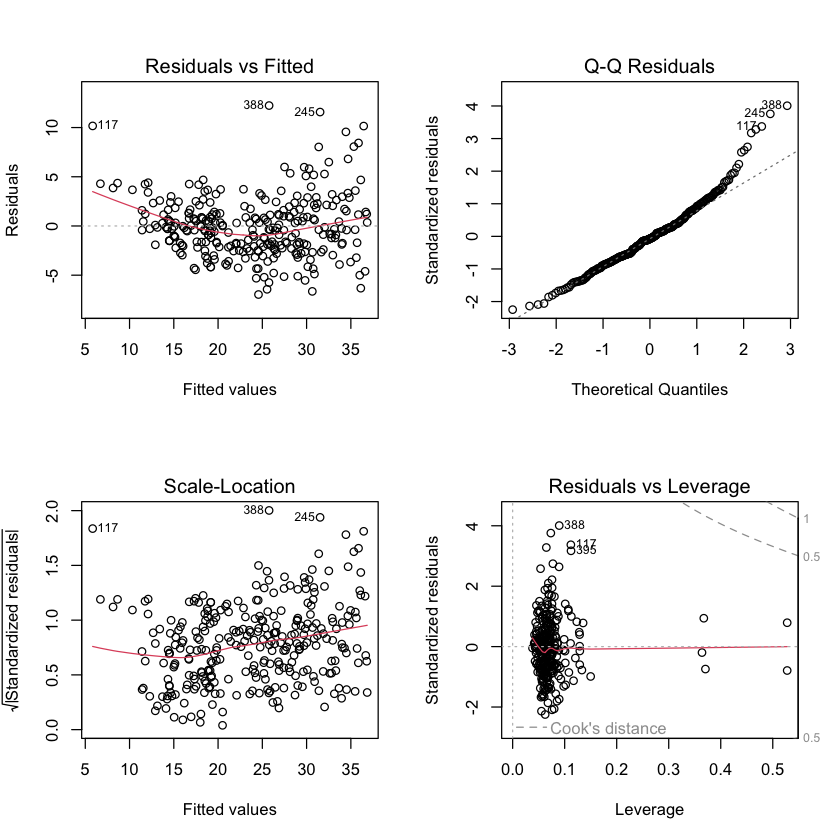

In [44]:
# Plot residuals
par(mfrow = c(2, 2))
plot(step_model)


### NHẬN XÉT:
- Biểu đồ Residuals vs Fitted: Các phần dư có xu hướng phân tán xung quanh đường ngang (y=0), tuy nhiên, có một số mẫu có thể nhận thấy ở các giá trị cao hơn và thấp hơn. Điều này có thể chỉ ra rằng mô hình có thể không hoàn toàn tuyến tính hoặc có sự hiện diện của heteroscedasticity.
- Biểu đồ Q-Q (Quantile-Quantile Plot): Các điểm phần dư khá gần với đường chéo, nhưng có một số điểm lệch ra xa ở phần cuối (cả đầu và cuối của dải số liệu). Điều này chỉ ra rằng phần lớn các phần dư tuân theo phân phối chuẩn, nhưng có một số ngoại lệ đáng chú ý. Các ngoại lệ này có thể là do sự bất thường trong dữ liệu.
- Biểu đồ Scale-Location (Spread-Location): Các điểm phần dư chuẩn hóa có xu hướng phân tán ngẫu nhiên, nhưng có một số mẫu xuất hiện (ví dụ: xu hướng giảm dần hoặc tăng dần). Điều này có thể chỉ ra rằng có sự không đồng nhất của phương sai (heteroscedasticity)
- Biểu đồ Residuals vs Leverage: Có một số điểm nằm xa ra ngoài so với các điểm khác và các đường Cook's distance. Điều này chỉ ra rằng có một số điểm dữ liệu có đòn bẩy cao và ảnh hưởng lớn đến mô hình. 

# DỰ ĐOÁN

In [45]:
## As factor 3 biến phân loại:
for (col in list_ploai){
    test.data[[col]] = as.factor(test.data[[col]])
}
# ref_dict <- c(cylinders = "4", modelyear = "73", origin = "1")
## As factor 3 biến phân loại với ref là giá trị có mod cao nhất:
for (col in list_ploai){
    test.data[[col]] = relevel(test.data[[col]], ref = ref_dict[col])
}


In [46]:
# Thực hiện dự đoán
predictions <- step_model %>% predict(test.data)

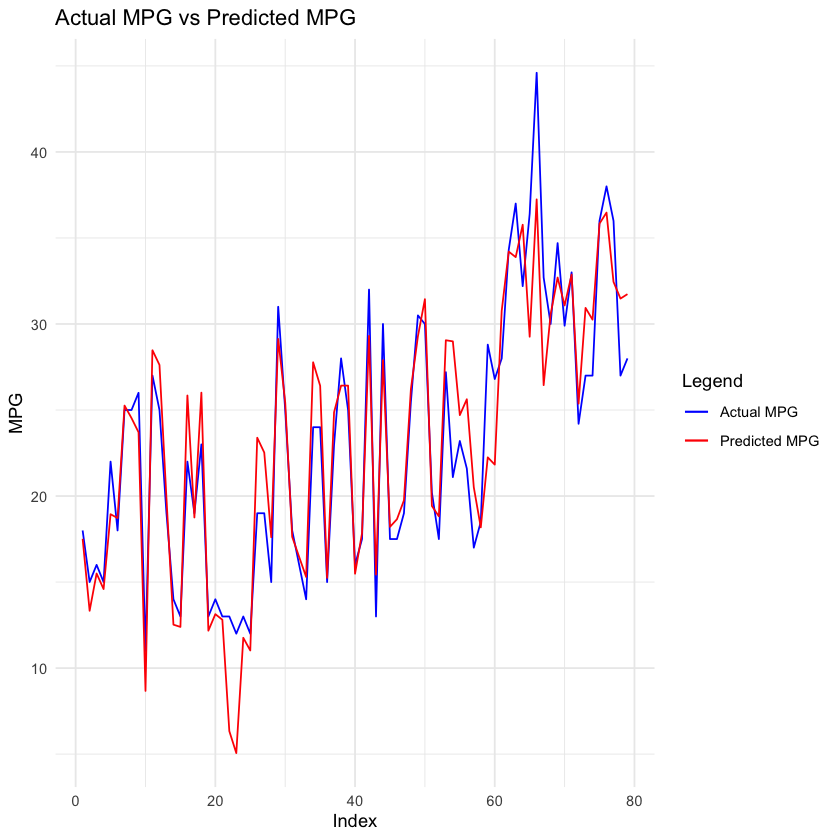

In [47]:

test.data$mpg_prediction = predictions
# Plotting
# Plotting with legend
ggplot(test.data, aes(x = 1:nrow(test.data))) +
  geom_line(aes(y = mpg, color = "Actual MPG")) +
  geom_line(aes(y = mpg_prediction, color = "Predicted MPG")) +
  labs(title = "Actual MPG vs Predicted MPG",
       x = "Index",
       y = "MPG",
       color = "Legend") +  # Adding legend title
  scale_color_manual(values = c("Actual MPG" = "blue", "Predicted MPG" = "red")) +
  theme_minimal()

In [48]:
# Khoảng tin cậy
predict(step_model, newdata =test.data , interval = "confidence", level=0.95)

,fit,lwr,upr
1,17.515284,15.264262,19.766305
2,13.330110,11.100119,15.560101
4,15.497711,13.246642,17.748779
13,14.592595,12.015392,17.169799
16,18.943876,16.693787,21.193966
17,18.720934,16.470317,20.971551
21,25.257934,22.928818,27.587049
23,24.529125,22.121075,26.937175
24,23.710874,21.320895,26.100854
28,8.674606,5.442753,11.906459


In [49]:
# Khoảng dự đoán
predict(step_model, newdata =test.data , interval = "prediction", level=0.95)

,fit,lwr,upr
1,17.515284,10.8256414,24.20493
2,13.330110,6.6475150,20.01270
4,15.497711,8.8080527,22.18737
13,14.592595,7.7862606,21.39893
16,18.943876,12.2545477,25.63320
17,18.720934,12.0314282,25.41044
21,25.257934,18.5416108,31.97426
23,24.529125,17.7850225,31.27323
24,23.710874,16.9732030,30.44855
28,8.674606,1.5944161,15.75480


In [50]:
ss=RMSE(predictions, test.data$mpg)
ss

[1] 2.927289

- RMSE = 2.92728913953034: Điều này có nghĩa là trung bình các dự đoán của mô hình lệch khoảng 2.93 đơn vị mpg so với các giá trị thực tế.

In [51]:
summary(test.data$mpg)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.00   17.25   23.00   23.11   28.00   44.60 